In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [7]:
# Step 2: Load the .csv files from Activity 1
acc_df = pd.read_csv("acc_data.csv")     # Contains timestamp, acc_x, acc_y, acc_z
gyro_df = pd.read_csv("gyro_data.csv")   # Contains timestamp, gyro_x, gyro_y, gyro_z

In [8]:
# Step 3: Normalize timestamps and extract signals
t_acc = acc_df['timestamp'] - acc_df['timestamp'].iloc[0]     # Normalize time
t_gyro = gyro_df['timestamp'] - gyro_df['timestamp'].iloc[0]

acc_x = acc_df['acc_x']
acc_y = acc_df['acc_y']
acc_z = acc_df['acc_z']
gyro_x = gyro_df['gyro_x']
gyro_y = gyro_df['gyro_y']
gyro_z = gyro_df['gyro_z']

In [9]:
# Step 4: Define filter functions

# Moving Average Filter
def moving_average(signal, window):
    return signal.rolling(window=window, center=True).mean()

# Median Filter
def median_filter(signal, window):
    return signal.rolling(window=window, center=True).median()

# Low-pass Filter using Butterworth design
def lowpass_filter(signal, fs, cutoff):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(N=2, Wn=normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

In [10]:
# Step 5: Estimate sampling rate from timestamps
sampling_interval = np.mean(np.diff(t_acc))
fs = 1.0 / sampling_interval  # Hz
print("Sampling rate:", fs, "Hz")

Sampling rate: 9.833335270895171 Hz


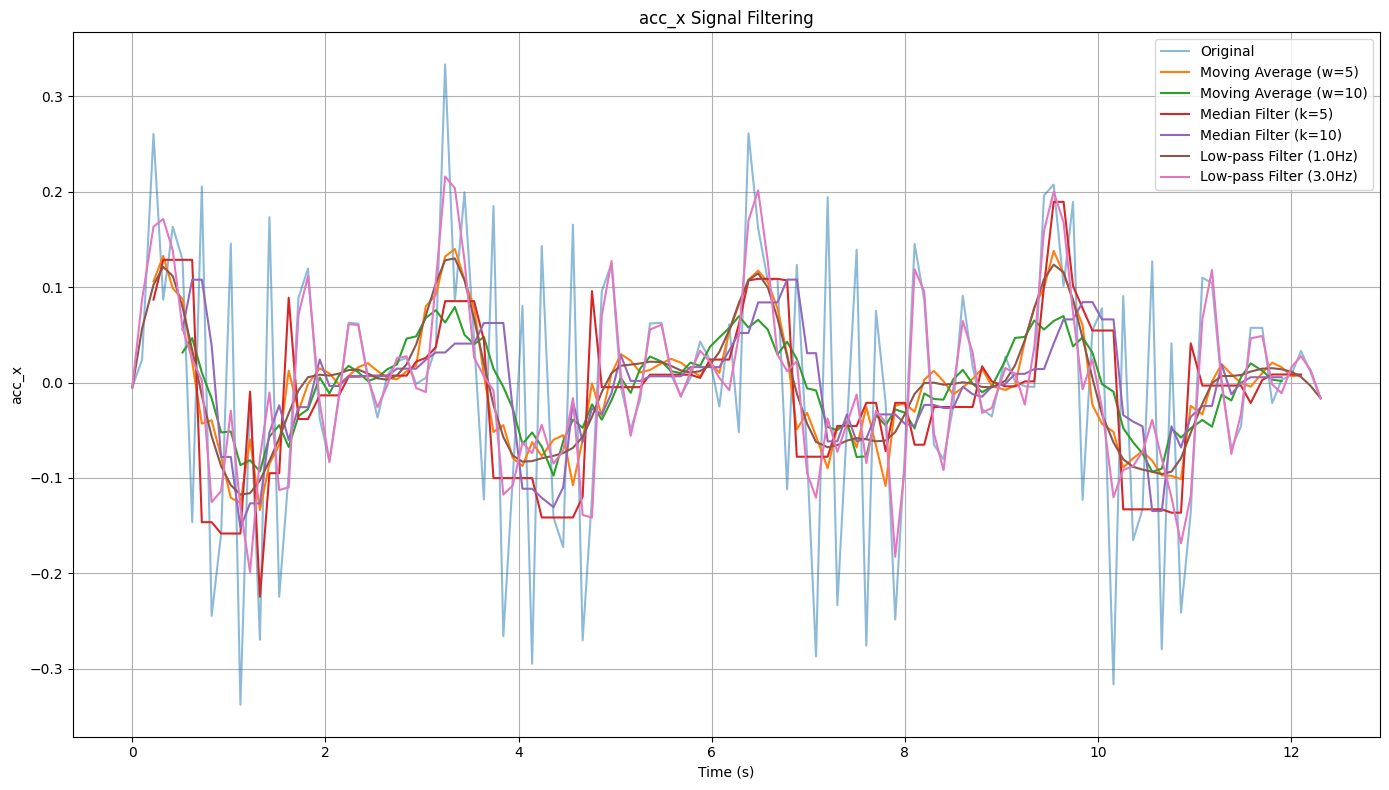

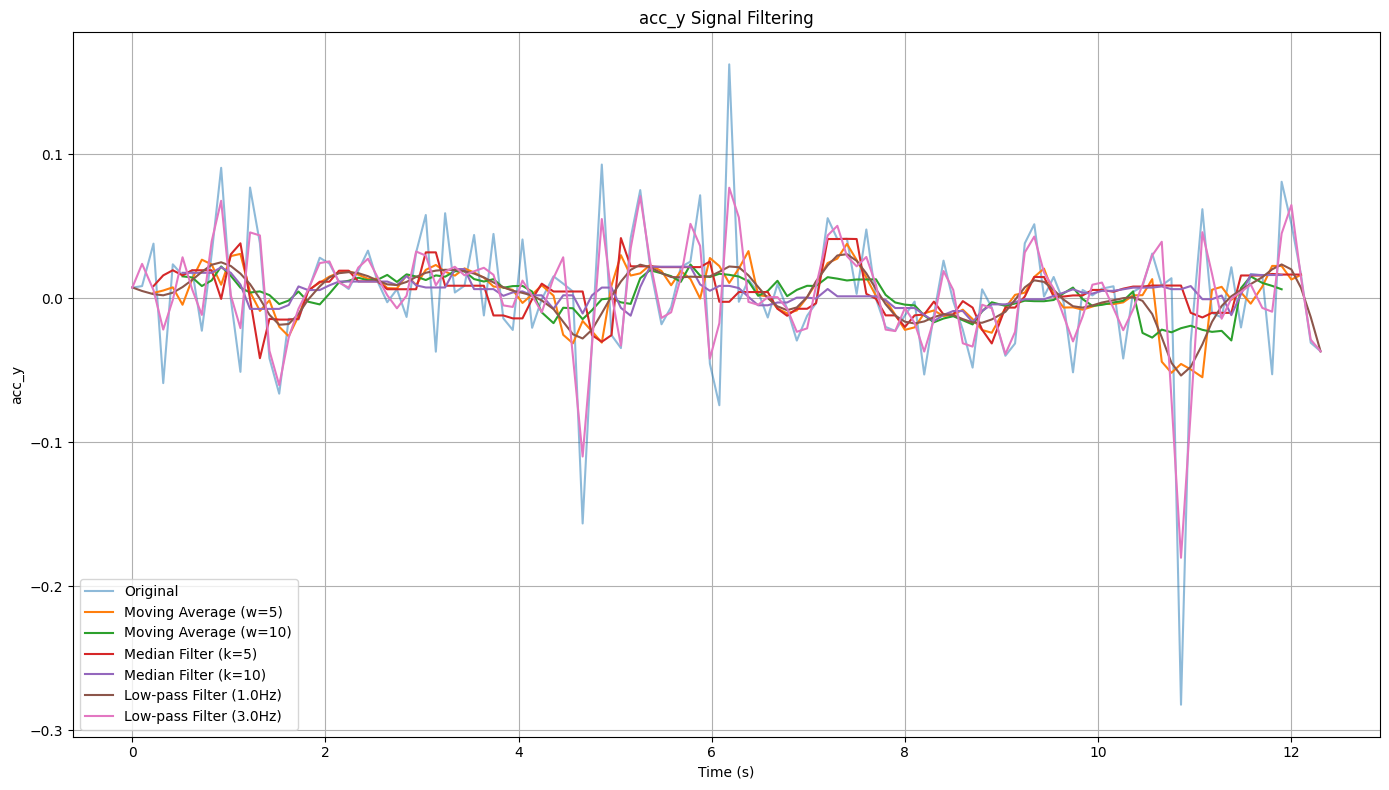

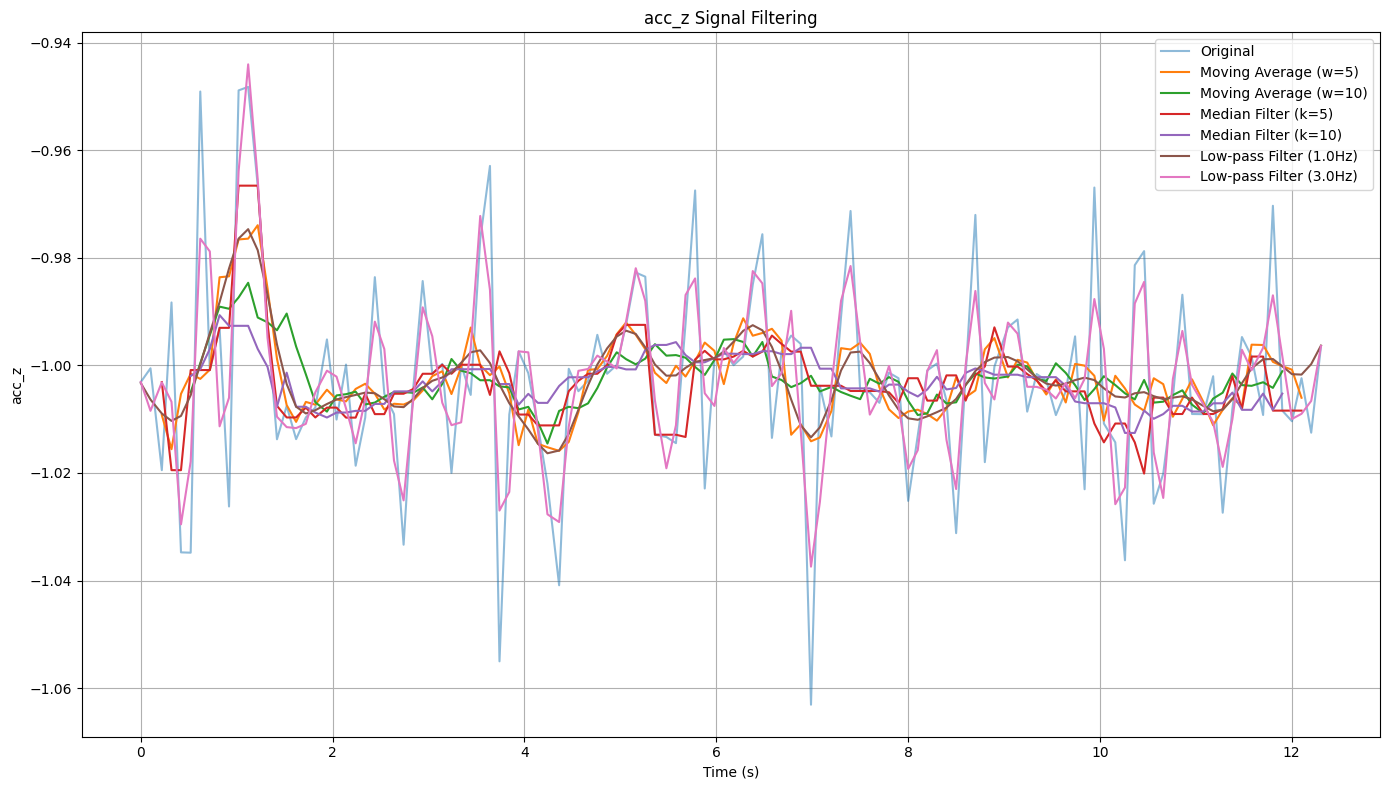

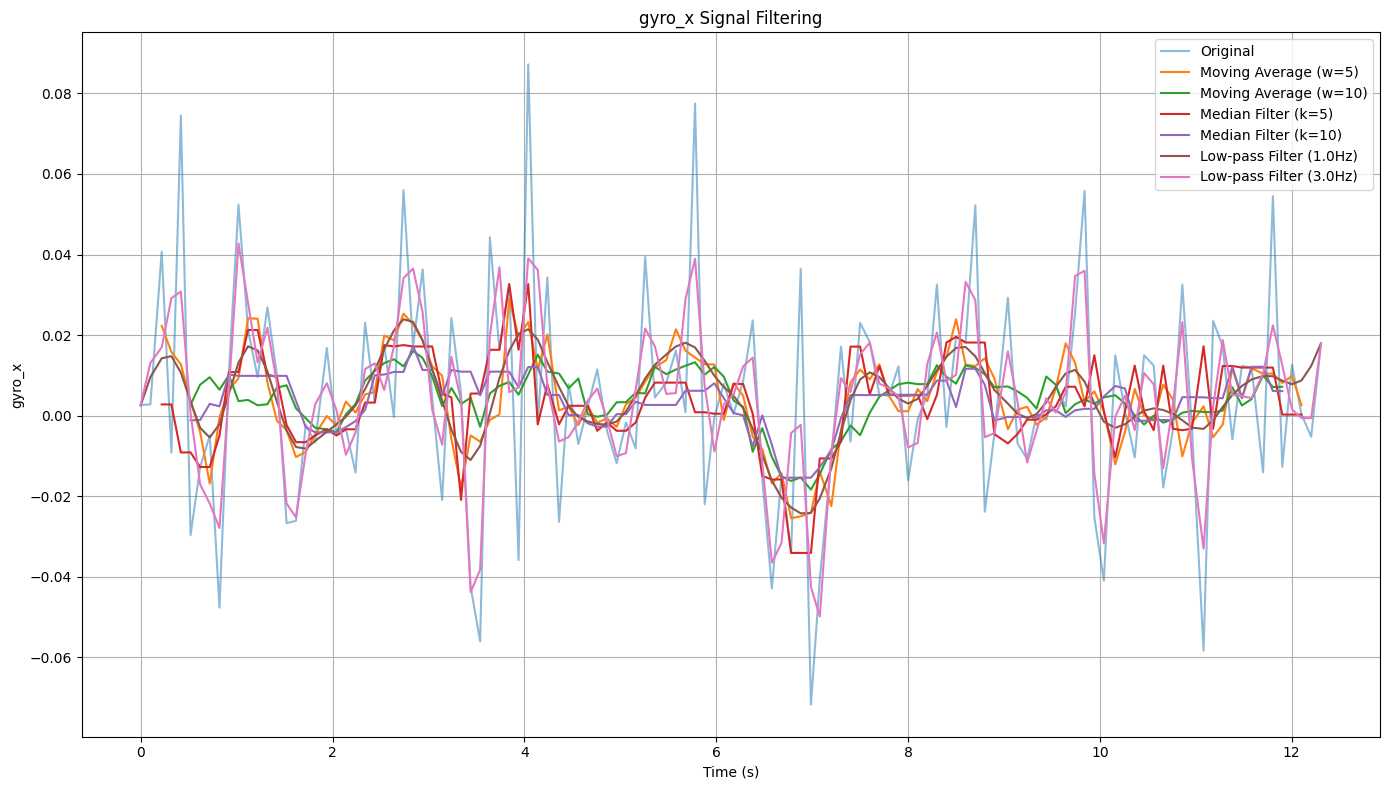

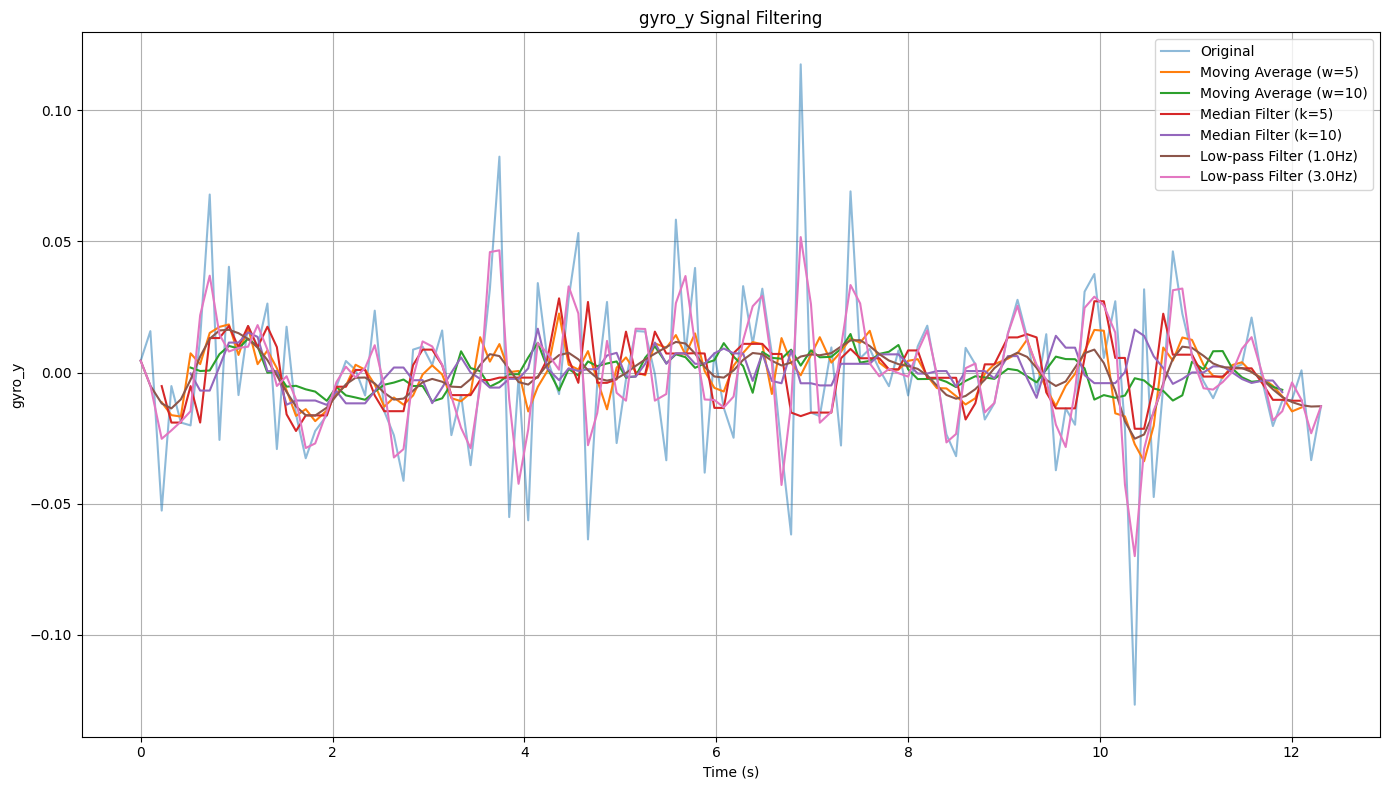

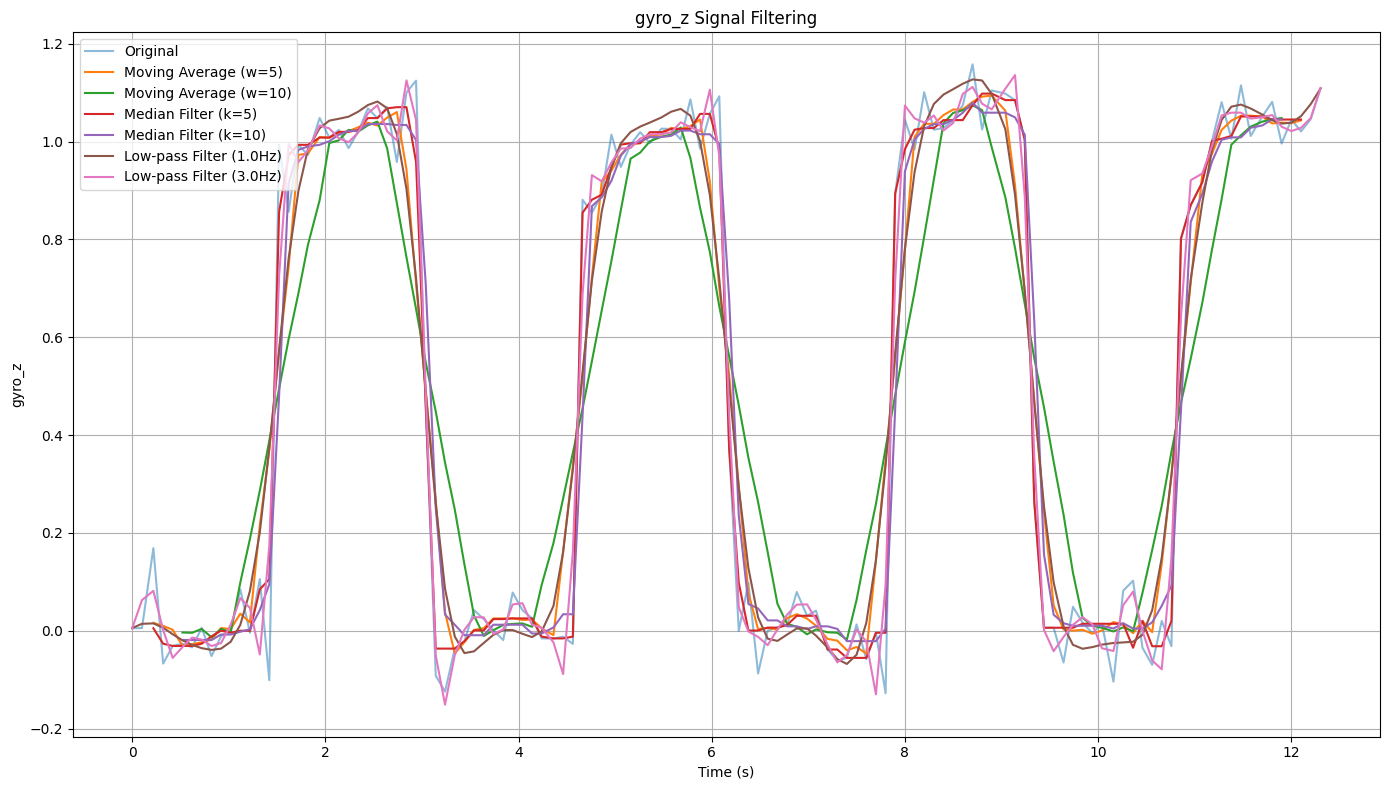

In [12]:
# Step 6: Define a function to visualize all filtering methods
def plot_filters(signal, t, label):
    plt.figure(figsize=(14, 8))
    plt.plot(t, signal, label='Original', alpha=0.5)
    plt.plot(t, moving_average(signal, 5), label='Moving Average (w=5)')
    plt.plot(t, moving_average(signal, 10), label='Moving Average (w=10)')
    plt.plot(t, median_filter(signal, 5), label='Median Filter (k=5)')
    plt.plot(t, median_filter(signal, 10), label='Median Filter (k=10)')
    plt.plot(t, lowpass_filter(signal, fs, 1.0), label='Low-pass Filter (1.0Hz)')
    plt.plot(t, lowpass_filter(signal, fs, 3.0), label='Low-pass Filter (3.0Hz)')
    plt.title(f"{label} Signal Filtering")
    plt.xlabel("Time (s)")
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 7: Plot and compare filters for each signal
plot_filters(acc_x, t_acc, "acc_x")
plot_filters(acc_y, t_acc, "acc_y")
plot_filters(acc_z, t_acc, "acc_z")
plot_filters(gyro_x, t_gyro, "gyro_x")
plot_filters(gyro_y, t_gyro, "gyro_y")
plot_filters(gyro_z, t_gyro, "gyro_z")